# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [22]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

## Q1 solution

In [6]:

json_df = pd.read_json('data/world_bank_projects.json')
json_df_topten = json_df[['_id','countrycode','countryshortname','project_name']]
frequency = json_df_topten.countrycode.value_counts(dropna=False)
frequency.head(10)

CN    19
ID    19
VN    17
IN    16
RY    13
BD    12
MA    12
NP    12
MZ    11
3A    11
Name: countrycode, dtype: int64

In [7]:
###############

## Q2 : top 10 major project themes (using column 'mjtheme_namecode')

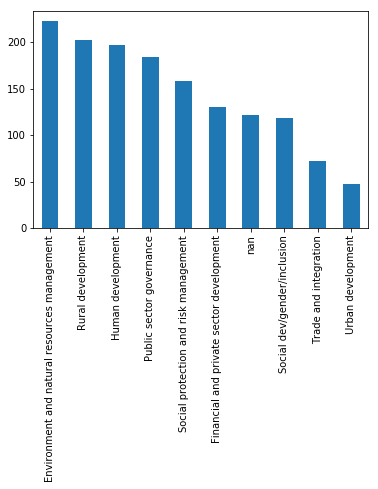

In [20]:
theme_dict = {'code': [],
              'name': []}

for index, row in json_df.iterrows():
    theme_dict['name'].extend([elem['name'] for elem in row['mjtheme_namecode']])
    theme_dict['code'].extend([elem['code'] for elem in row['mjtheme_namecode']])

    theme_df = pd.DataFrame.from_dict(theme_dict)
df_actual = theme_df.replace('', np.nan)

df_actual['name'].value_counts(dropna=False).head(10).plot(kind='bar')


## Q3 : Create a dataframe with the missing names filled in.

In [13]:
df_now =df_actual.dropna()
df_now.reset_index(inplace = True)
df_now1 = df_now.drop(['index'], axis = 1)
df_uniq = pd.DataFrame(df_now1.groupby(['code','name']).size().reset_index())
print(df_uniq)

   code                                          name    0
0     1                           Economic management   33
1    10                             Rural development  202
2    11  Environment and natural resources management  223
3     2                      Public sector governance  184
4     3                                   Rule of law   12
5     4      Financial and private sector development  130
6     5                         Trade and integration   72
7     6         Social protection and risk management  158
8     7                   Social dev/gender/inclusion  119
9     8                             Human development  197
10    9                             Urban development   47


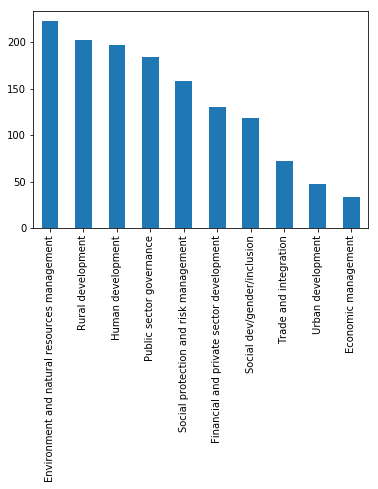

In [21]:
df_merged=pd.merge(df_actual,df_uniq,on=['code','name'])
df_merged.name.value_counts(dropna=False).head(10).plot(kind='bar')